#**Exploratory data analysis**

# *Reading files*

In [3]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
#importing data
data = pd.read_csv('/content/datasets_66762_131607_Prostate_Cancer.csv')

In [5]:
#first 5 instances using "head()" function
data.head()

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059


In [6]:
#last 5 instances using "tail()" function
data.tail()

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
95,96,M,23,16,132,1264,0.091,0.131,0.210,0.056
96,97,B,22,14,78,451,0.105,0.071,0.190,0.066
97,98,B,19,27,62,295,0.102,0.053,0.135,0.069
98,99,B,21,24,74,413,0.090,0.075,0.162,0.066
99,100,M,16,27,94,643,0.098,0.114,0.188,0.064


In [7]:
#finding out the shape of the data using "shape" variable: Output (rows, columns)
data.shape

(100, 10)

In [8]:
#Printing all the columns present in data
data.columns

Index(['id', 'diagnosis_result', 'radius', 'texture', 'perimeter', 'area',
       'smoothness', 'compactness', 'symmetry', 'fractal_dimension'],
      dtype='object')

# **Variable identification and typecasting**

In [9]:
# Identifying variables with integer datatype
data.dtypes[data.dtypes == 'int64']

id           int64
radius       int64
texture      int64
perimeter    int64
area         int64
dtype: object

In [10]:
#identifying variables with float datatype
data.dtypes[data.dtypes == 'float']

smoothness           float64
compactness          float64
symmetry             float64
fractal_dimension    float64
dtype: object

In [11]:
data['diagnosis_result'] = data['diagnosis_result'].astype('category')

In [12]:
data.dtypes

id                      int64
diagnosis_result     category
radius                  int64
texture                 int64
perimeter               int64
area                    int64
smoothness            float64
compactness           float64
symmetry              float64
fractal_dimension     float64
dtype: object

# **Univariate Analysis : Numerical variables**

In [13]:
data['id'].nunique()

100

In [14]:
data = data.drop('id', axis = 1)

In [15]:
data.select_dtypes(include = ['int64', 'float64']).dtypes

radius                 int64
texture                int64
perimeter              int64
area                   int64
smoothness           float64
compactness          float64
symmetry             float64
fractal_dimension    float64
dtype: object

In [16]:
integer_data = ['radius', 'texture', 'perimeter', 'area']
float_data = ['smoothness', 'compactness', 'symmetry', 'fractal_dimension']

In [17]:
# custom function for easy and efficient analysis of numerical univariate

def UVA_numeric(data, var_group):
  '''
  Univariate_Analysis_numeric
  takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,3), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()

    # calculating points of standard deviation
    points = mean-st_dev, mean+st_dev

    #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=True)
    sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
    sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
    sns.scatterplot([mean], [0], color = 'red', label = "mean")
    sns.scatterplot([median], [0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))

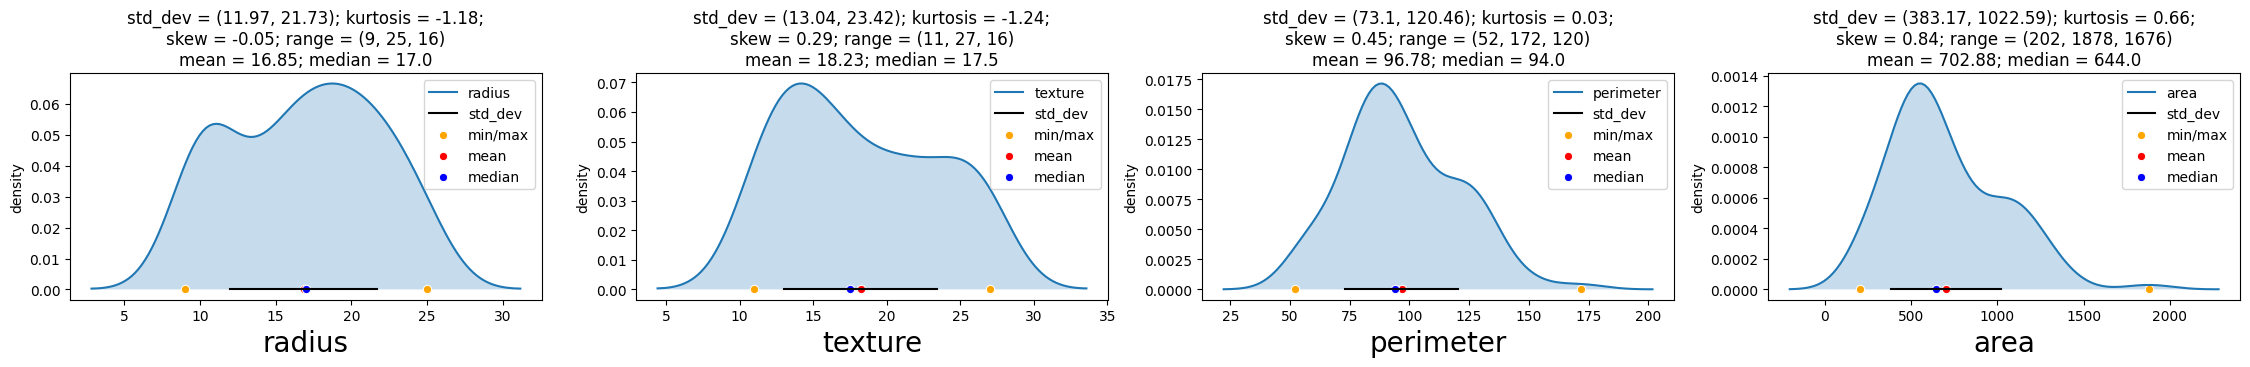

In [18]:
UVA_numeric(data,integer_data)

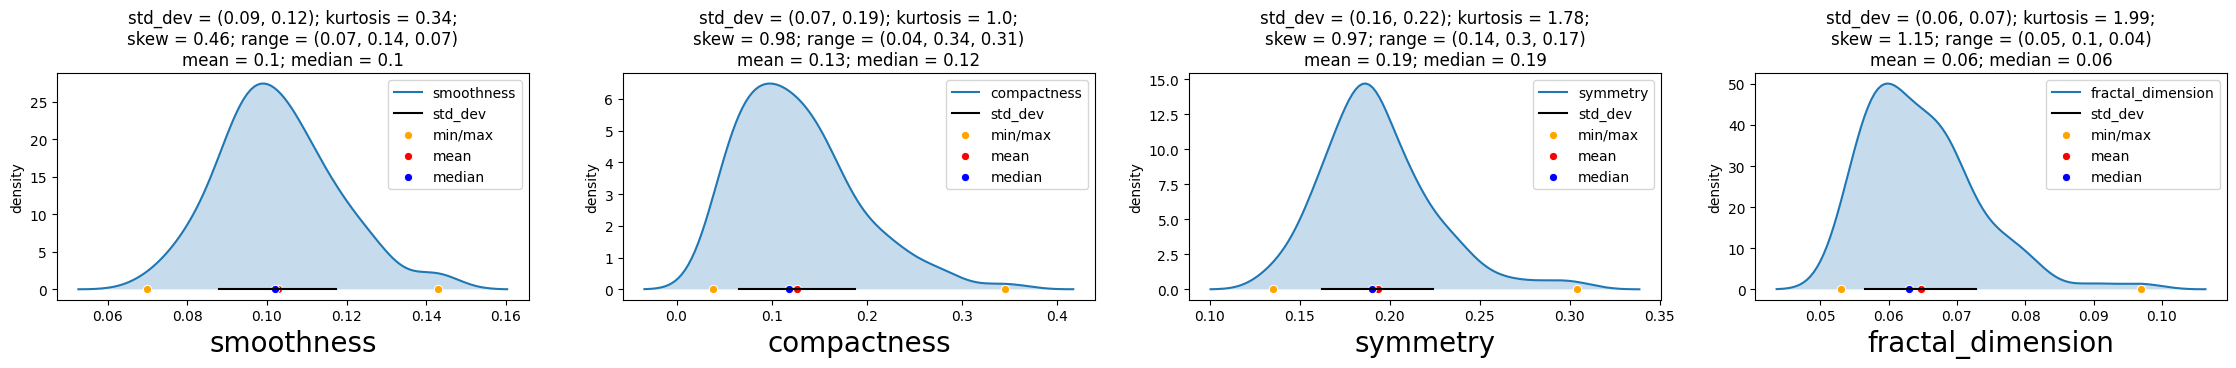

In [19]:
UVA_numeric(data,float_data)

# **Univariate Analysis : categorical variable**

In [20]:
def UVA_category(data, var_group):

  '''
  Univariate_Analysis_categorical
  takes a group of variables (category) and plot/print all the value_counts and barplot.
  '''
  # setting figure_size
  size = len(var_group)
  plt.figure(figsize = (7*size,5), dpi = 100)

  # for every variable
  for j,i in enumerate(var_group):
    norm_count = data[i].value_counts(normalize = True)
    n_uni = data[i].nunique()

  #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.barplot(norm_count, norm_count.index , order = norm_count.index)
    plt.xlabel('fraction/percent', fontsize = 20)
    plt.ylabel('{}'.format(i), fontsize = 20)
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))

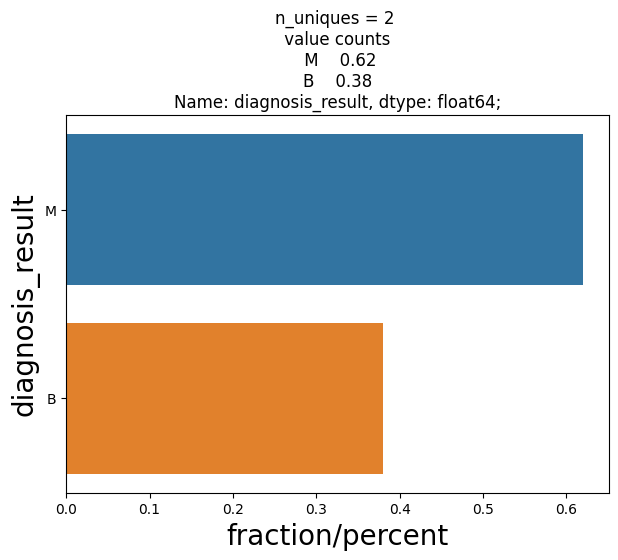

In [21]:
UVA_category(data, ['diagnosis_result'])

imbalnced dataset so evaluation metric is f1_score

# **Univariate analysis : missing values**

In [22]:
# finding number of missing values in every variable
data.isnull().sum()

diagnosis_result     0
radius               0
texture              0
perimeter            0
area                 0
smoothness           0
compactness          0
symmetry             0
fractal_dimension    0
dtype: int64

# **Univariate Analysis : outlier identification**

In [23]:
# custom function for easy outlier analysis

def UVA_outlier(data, var_group, include_outlier = True):
  '''
  Univariate_Analysis_outlier:
  takes a group of variables (INTEGER and FLOAT) and plot/print boplot and descriptives\n
  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it \n\n

  data : dataframe from which to plot from\n
  var_group : {list} type Group of Continuous variables\n
  include_outlier : {bool} whether to include outliers or not, default = True\n
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,4), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    quant25 = data[i].quantile(0.25)
    quant75 = data[i].quantile(0.75)
    IQR = quant75 - quant25
    med = data[i].median()
    whis_low = med-(1.5*IQR)
    whis_high = med+(1.5*IQR)

    # Calculating Number of Outliers
    outlier_high = len(data[i][data[i]>whis_high])
    outlier_low = len(data[i][data[i]<whis_low])

    if include_outlier == True:
      print(include_outlier)
      #Plotting the variable with every information
      plt.subplot(1,size,j+1)
      sns.boxplot(data[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('With Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))
      
    else:
      # replacing outliers with max/min whisker
      data2 = data[var_group][:]
      data2[i][data2[i]>whis_high] = whis_high+1
      data2[i][data2[i]<whis_low] = whis_low-1
      
      # plotting without outliers
      plt.subplot(1,size,j+1)
      sns.boxplot(data2[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('Without Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))

True
True
True
True


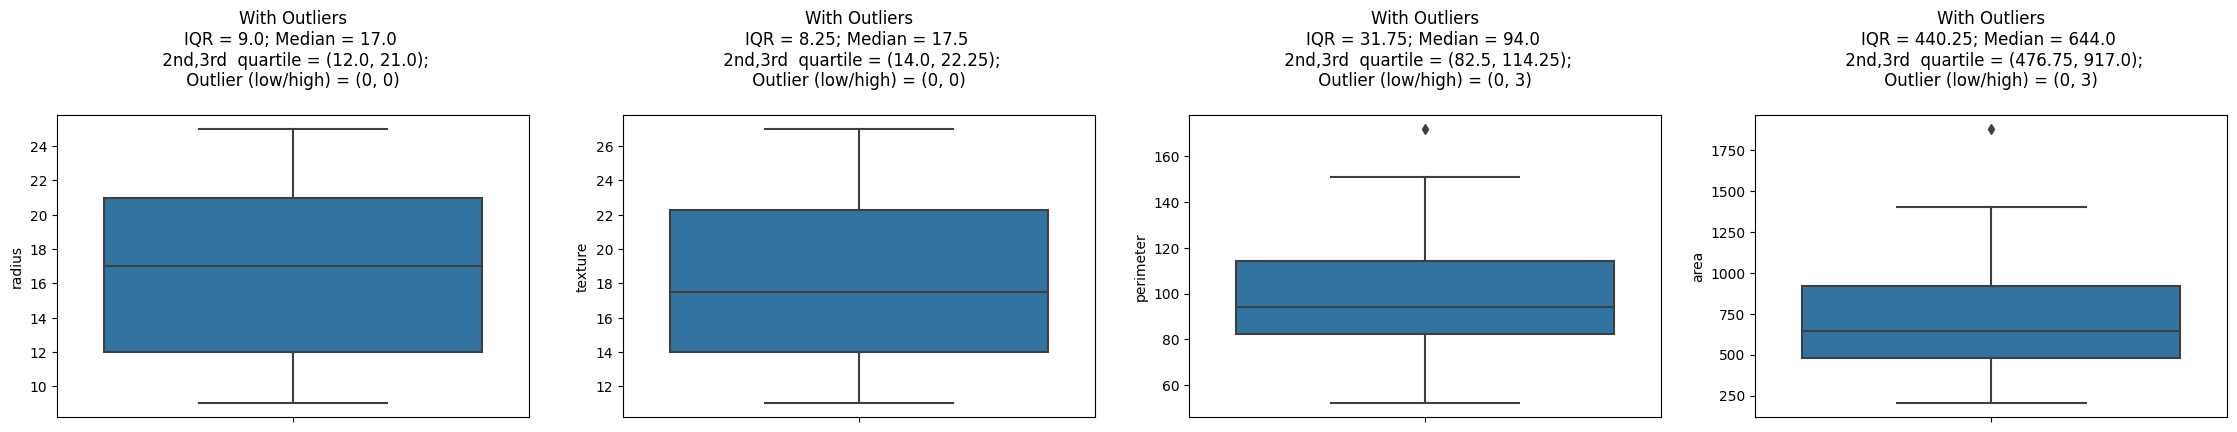

In [24]:
UVA_outlier(data, integer_data)

True
True
True
True


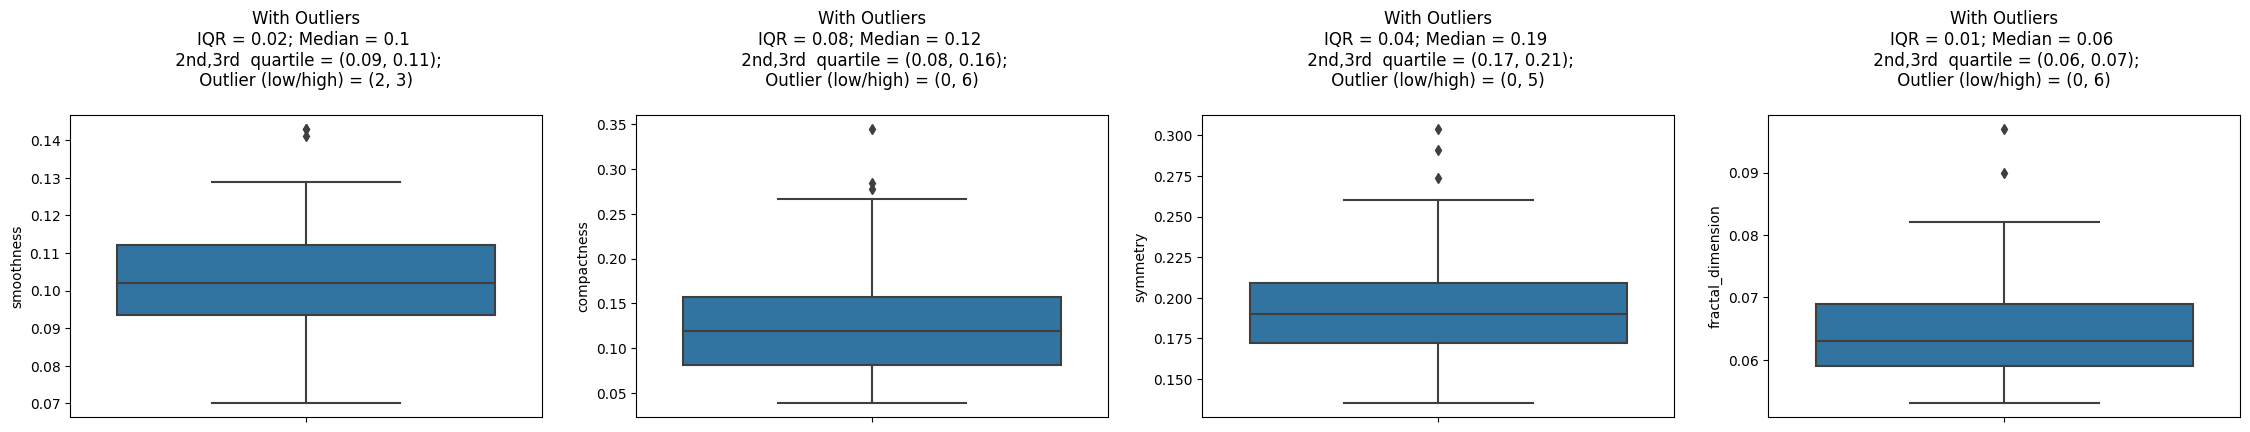

In [25]:
UVA_outlier(data,float_data)

# **Bi-Variate Analysis : Cont - Cont**

In [26]:
# isolating numerical datatypes
numerical = data.select_dtypes(include=['int64','float64'])[:]
numerical.dtypes

radius                 int64
texture                int64
perimeter              int64
area                   int64
smoothness           float64
compactness          float64
symmetry             float64
fractal_dimension    float64
dtype: object

In [27]:
#calculating correlation
correlation = numerical.dropna().corr()
correlation

,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
radius,1.000000,0.100245,-0.238216,-0.250934,-0.127121,-0.191490,-0.039707,-0.029120
texture,0.100245,1.000000,-0.113453,-0.113725,0.102321,0.032446,0.077912,0.139157
perimeter,-0.238216,-0.113453,1.000000,0.976648,0.269442,0.527542,0.195539,-0.195434
area,-0.250934,-0.113725,0.976648,1.000000,0.208438,0.424950,0.110435,-0.274344
smoothness,-0.127121,0.102321,0.269442,0.208438,1.000000,0.465723,0.424203,0.369580
compactness,-0.191490,0.032446,0.527542,0.424950,0.465723,1.000000,0.681123,0.647953
symmetry,-0.039707,0.077912,0.195539,0.110435,0.424203,0.681123,1.000000,0.568608
fractal_dimension,-0.029120,0.139157,-0.195434,-0.274344,0.369580,0.647953,0.568608,1.000000


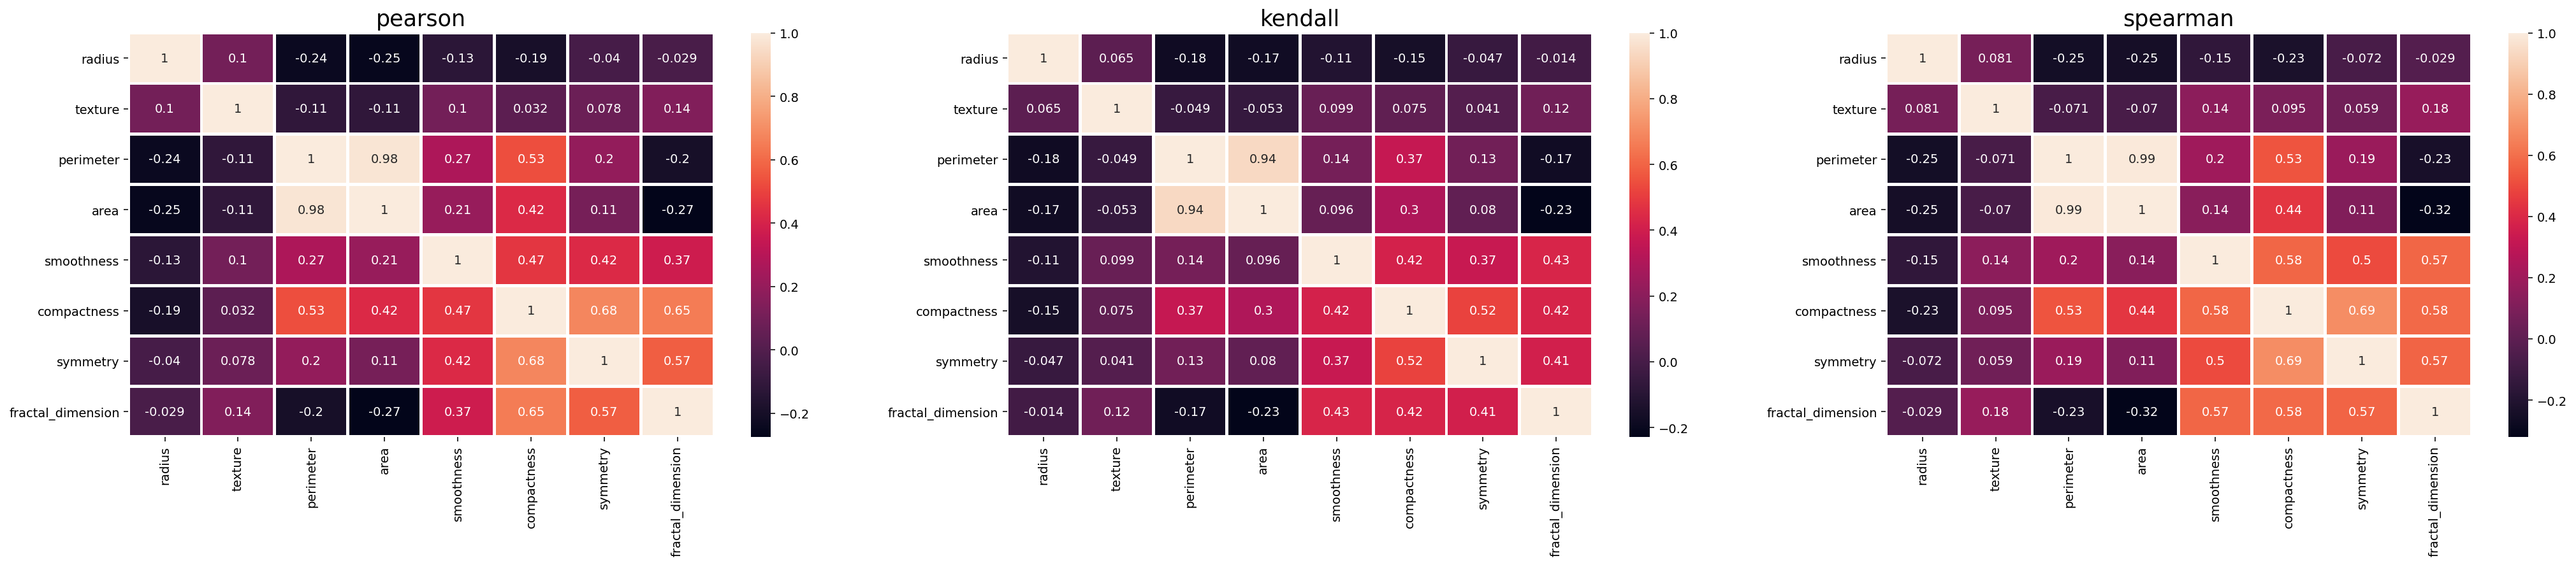

In [28]:
# plotting heatmap usill all methods for all numerical variables
plt.figure(figsize=(36,6), dpi=140)
for j,i in enumerate(['pearson','kendall','spearman']):
  plt.subplot(1,3,j+1)
  correlation = numerical.dropna().corr(method=i)
  sns.heatmap(correlation, annot = True, linewidth = 2)
  plt.title(i, fontsize=18)

area and perimeter are highly correlated

<Figure size 840x560 with 0 Axes>

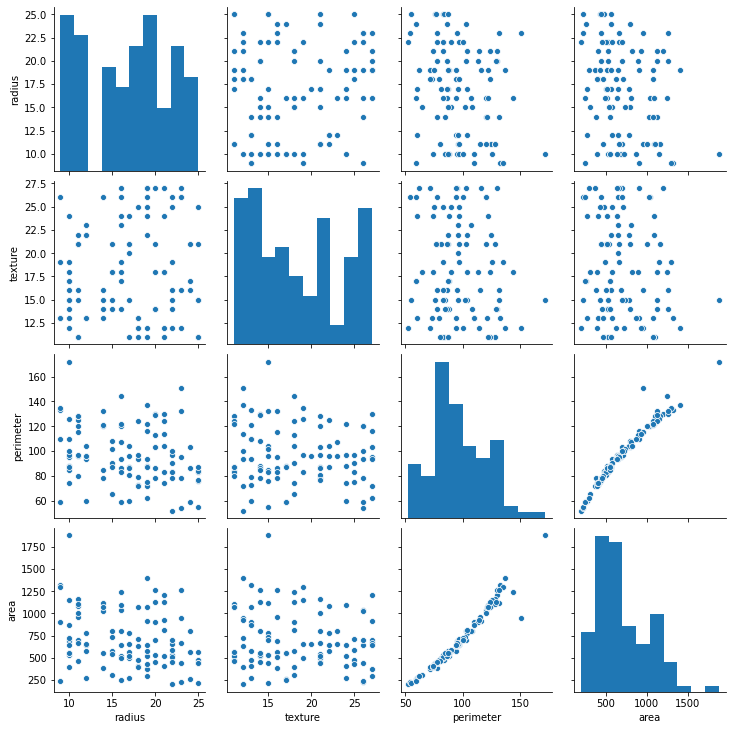

In [29]:
# scatter plot for integer_data
plt.figure(dpi=140)
sns.pairplot(numerical[integer_data])

it is clearly evident that area and perimetr are highly correlated in positive direction

<Figure size 840x560 with 0 Axes>

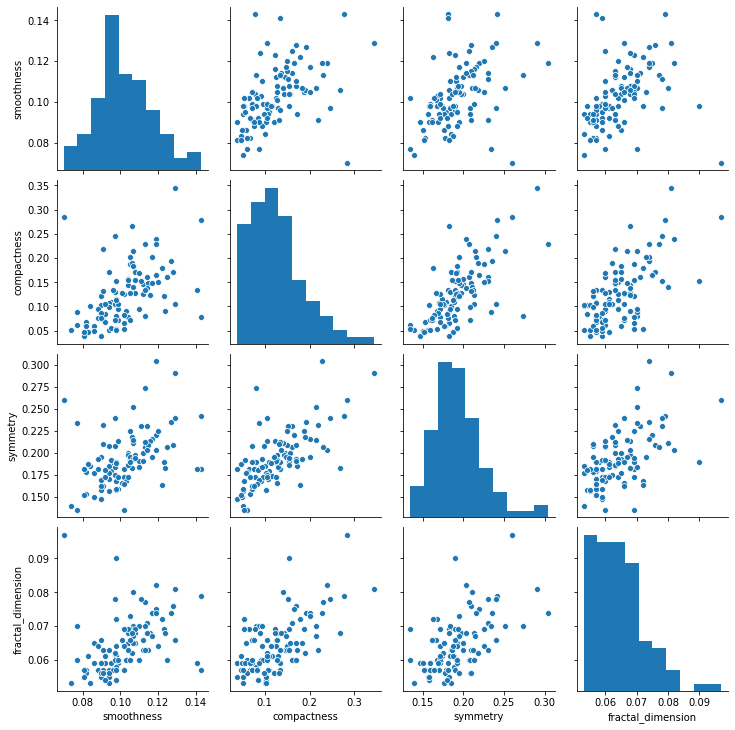

In [30]:
# scatter plot for float_data
plt.figure(dpi=140)
sns.pairplot(numerical[float_data])

every variable is correlated with every other variable

# **Bi_varaite : Cont - Cat**

In [31]:
def TwoSampZ(X1, X2, sigma1, sigma2, N1, N2):
  '''
  takes mean, standard deviation, and number of observations and returns p-value calculated for 2-sampled Z-Test
  '''
  from numpy import sqrt, abs, round
  from scipy.stats import norm
  ovr_sigma = sqrt(sigma1**2/N1 + sigma2**2/N2)
  z = (X1 - X2)/ovr_sigma
  pval = 2*(1 - norm.cdf(abs(z)))
  return pval

In [32]:
def TwoSampT(X1, X2, sd1, sd2, n1, n2):
  '''
  takes mean, standard deviation, and number of observations and returns p-value calculated for 2-sample T-Test
  '''
  from numpy import sqrt, abs, round
  from scipy.stats import t as t_dist
  ovr_sd = sqrt(sd1**2/n1 + sd2**2/n2)
  t = (X1 - X2)/ovr_sd
  df = n1+n2-2
  pval = 2*(1 - t_dist.cdf(abs(t),df))
  return pval

In [33]:
def Bivariate_cont_cat(data, cont, cat, category):
  #creating 2 samples
  x1 = data[cont][data[cat]==category][:]
  x2 = data[cont][~(data[cat]==category)][:]
  
  #calculating descriptives
  n1, n2 = x1.shape[0], x2.shape[0]
  m1, m2 = x1.mean(), x2.mean()
  std1, std2 = x1.std(), x2.mean()
  
  #calculating p-values
  t_p_val = TwoSampT(m1, m2, std1, std2, n1, n2)
  z_p_val = TwoSampZ(m1, m2, std1, std2, n1, n2)

  #table
  table = pd.pivot_table(data=data, values=cont, columns=cat, aggfunc = np.mean)

  #plotting
  plt.figure(figsize = (15,6), dpi=140)
  
  #barplot
  plt.subplot(1,2,1)
  sns.barplot([str(category),'not {}'.format(category)], [m1, m2])
  plt.ylabel('mean {}'.format(cont))
  plt.xlabel(cat)
  plt.title('t-test p-value = {} \n z-test p-value = {}\n {}'.format(t_p_val,
                                                                z_p_val,
                                                                table))

  # boxplot
  plt.subplot(1,2,2)
  sns.boxplot(x=cat, y=cont, data=data)
  plt.title('categorical boxplot')
  

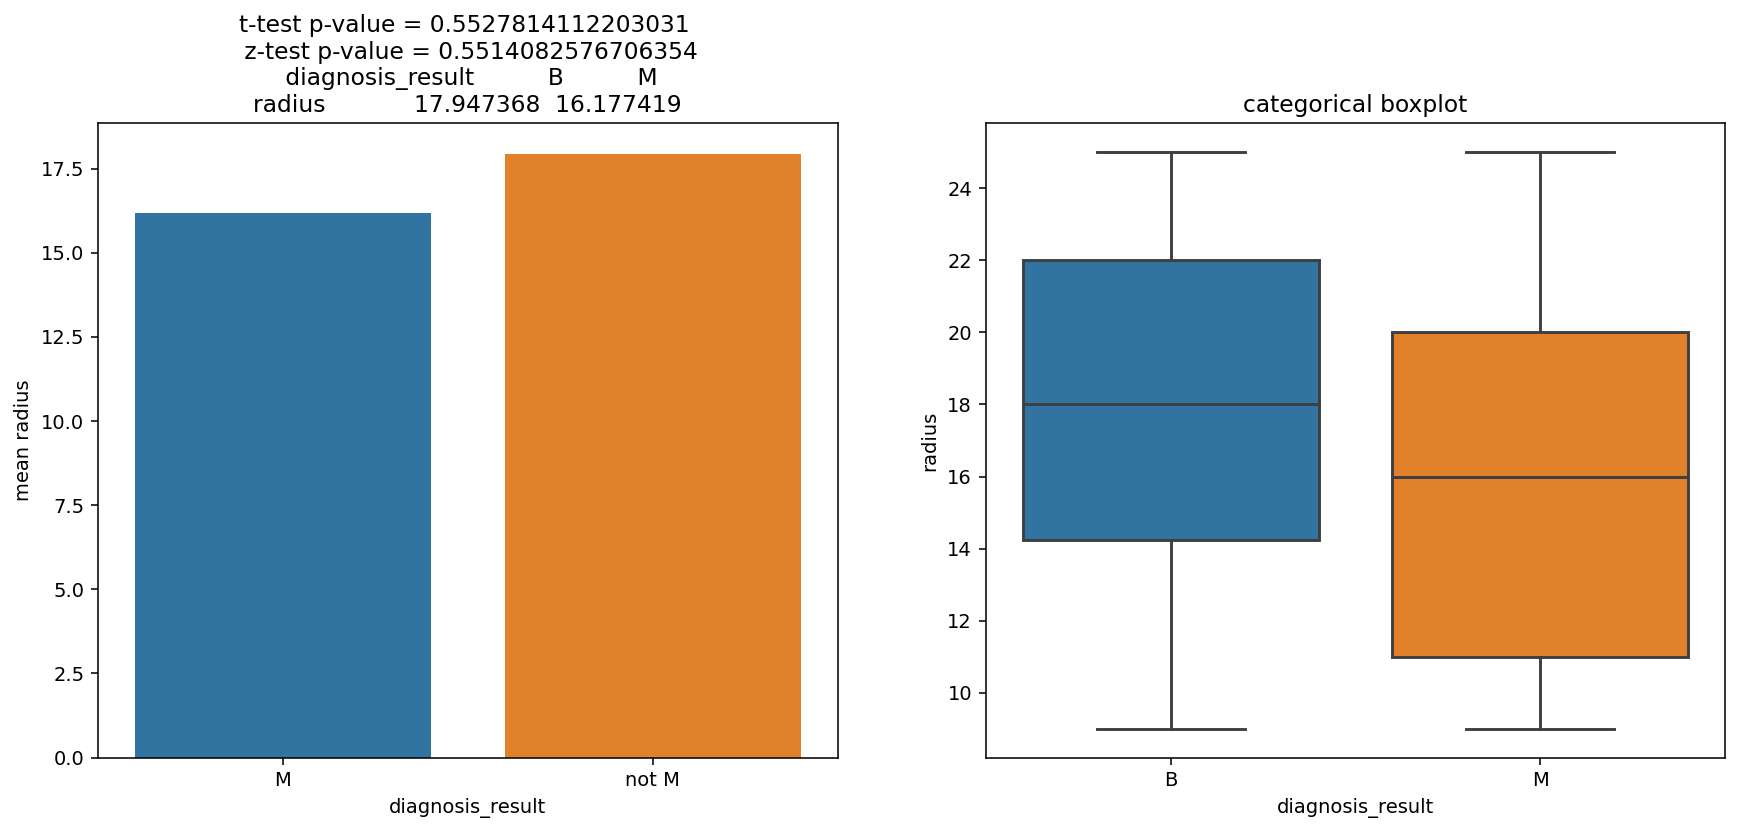

In [34]:
Bivariate_cont_cat(data, 'radius', 'diagnosis_result', 'M')

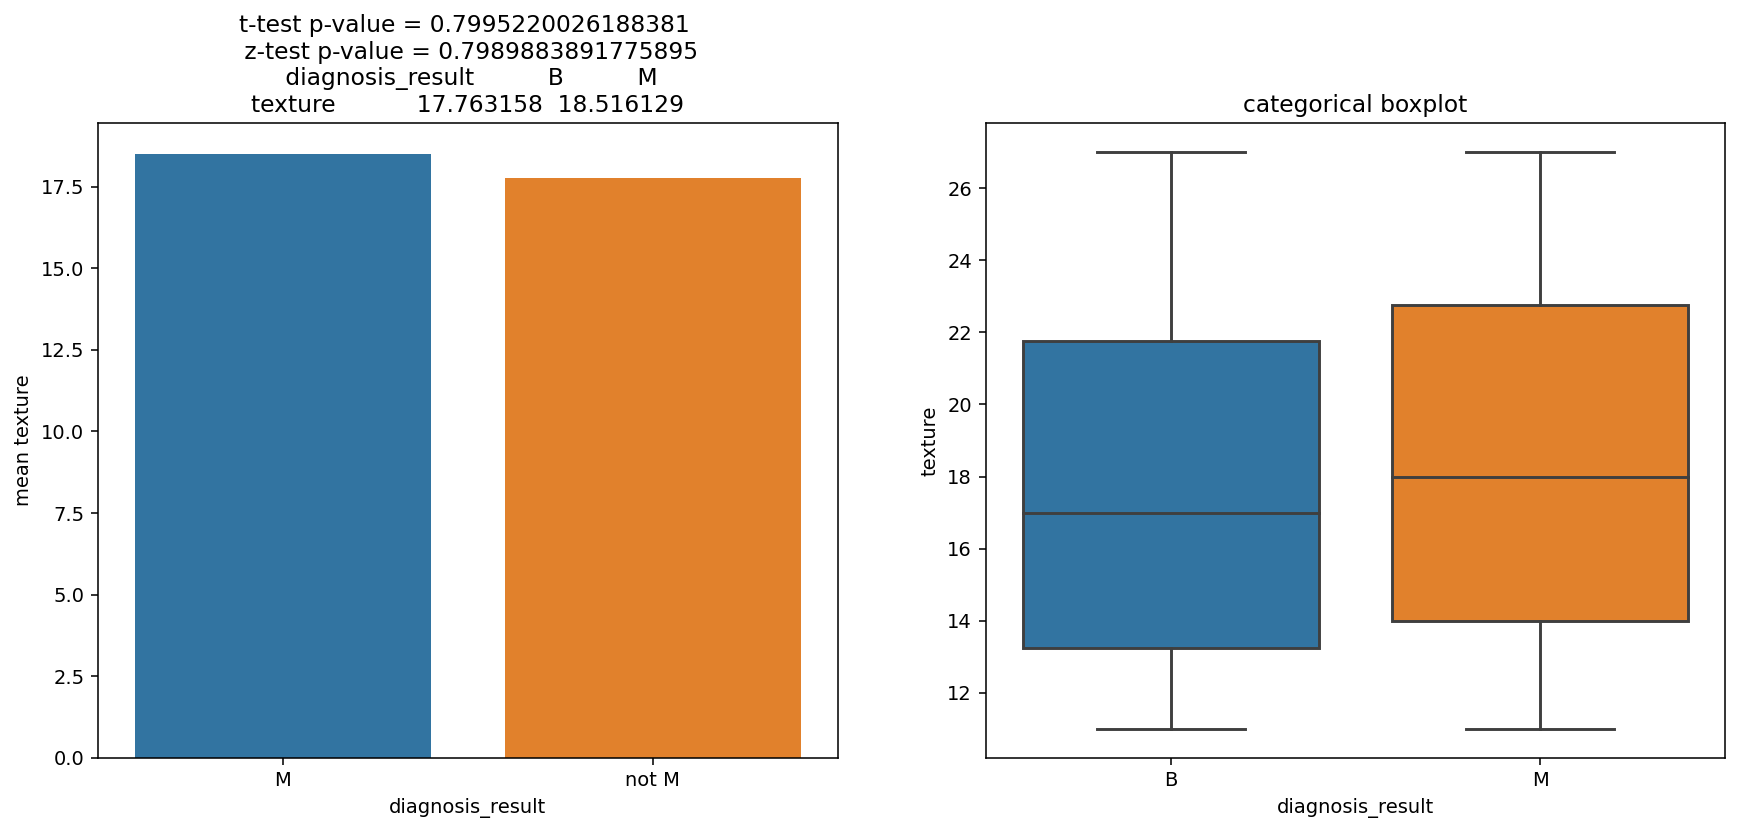

In [35]:
Bivariate_cont_cat(data, 'texture', 'diagnosis_result', 'M')

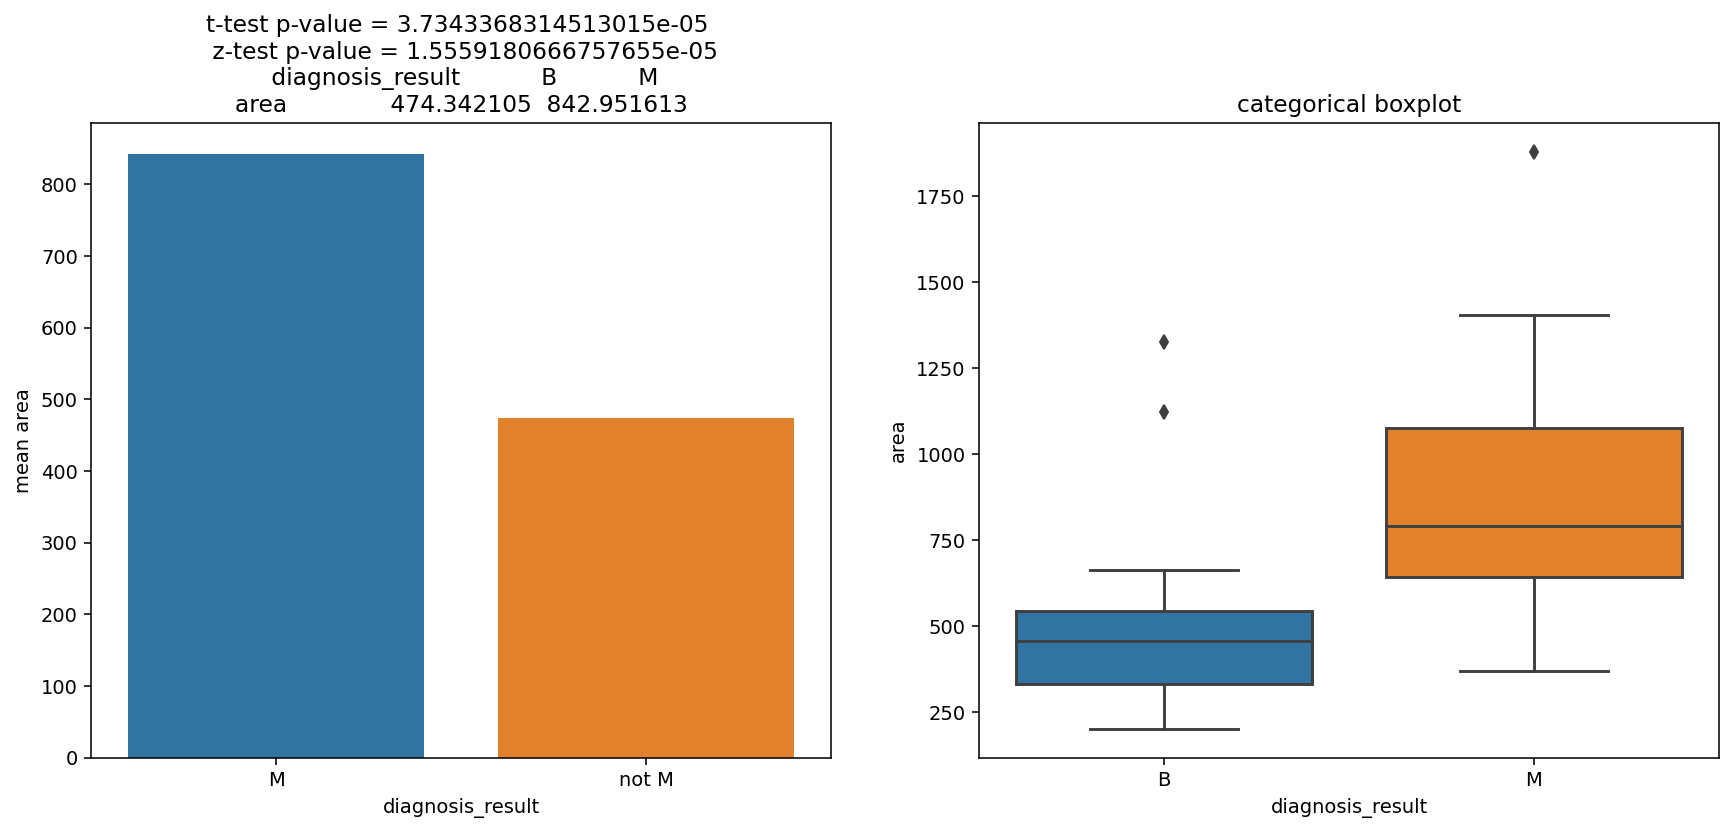

In [36]:
Bivariate_cont_cat(data, 'area', 'diagnosis_result', 'M')

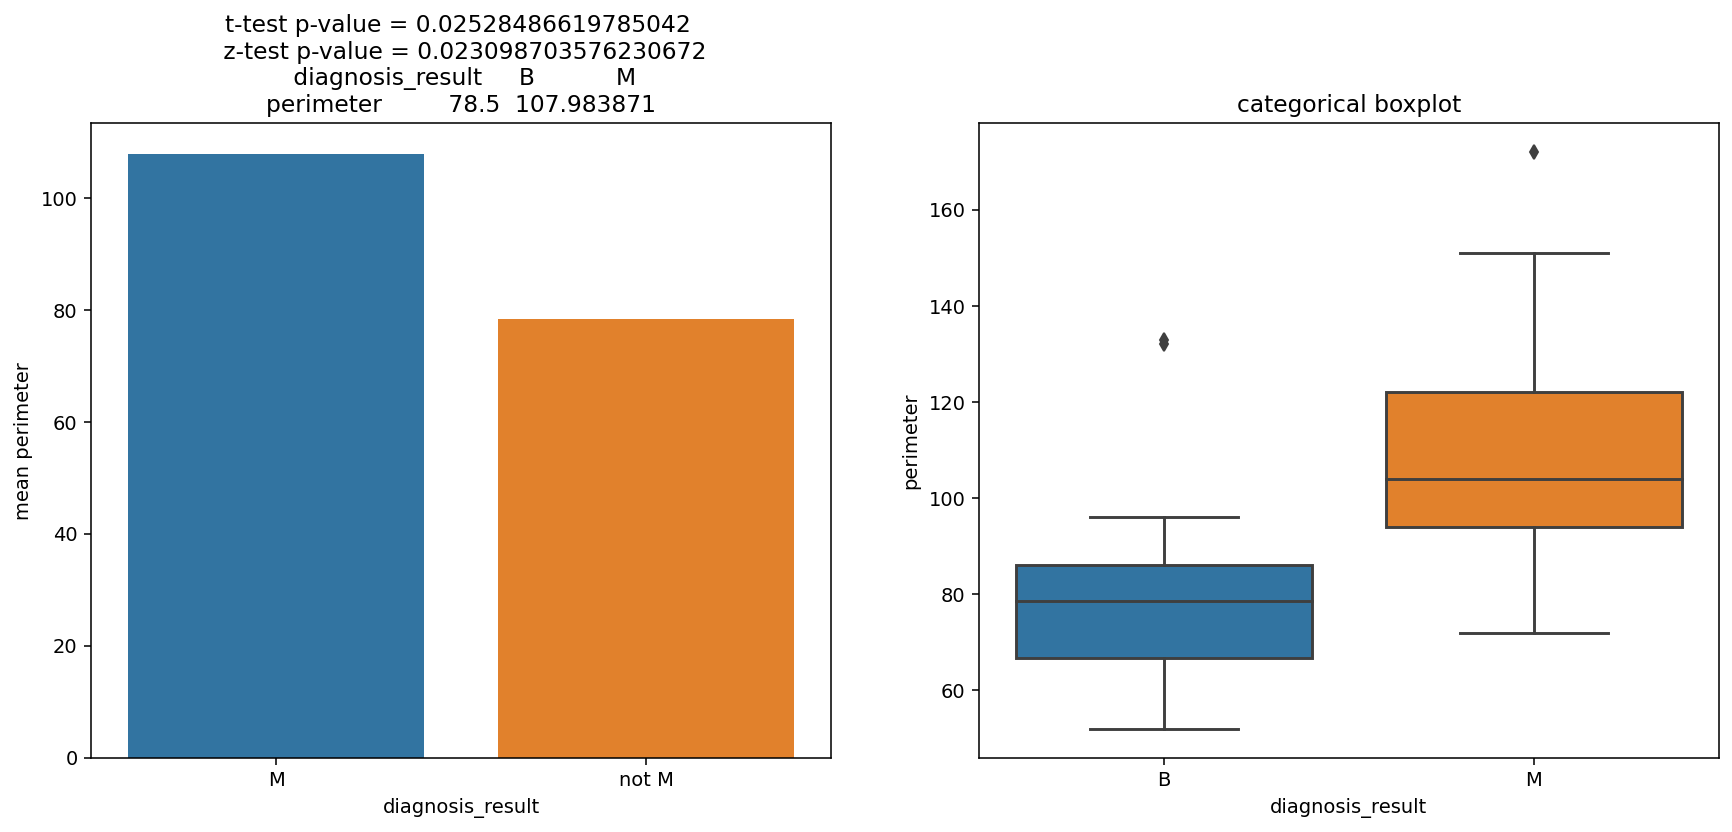

In [37]:
Bivariate_cont_cat(data, 'perimeter', 'diagnosis_result', 'M')

patients who are malignant have significantly higher values than beningn patients

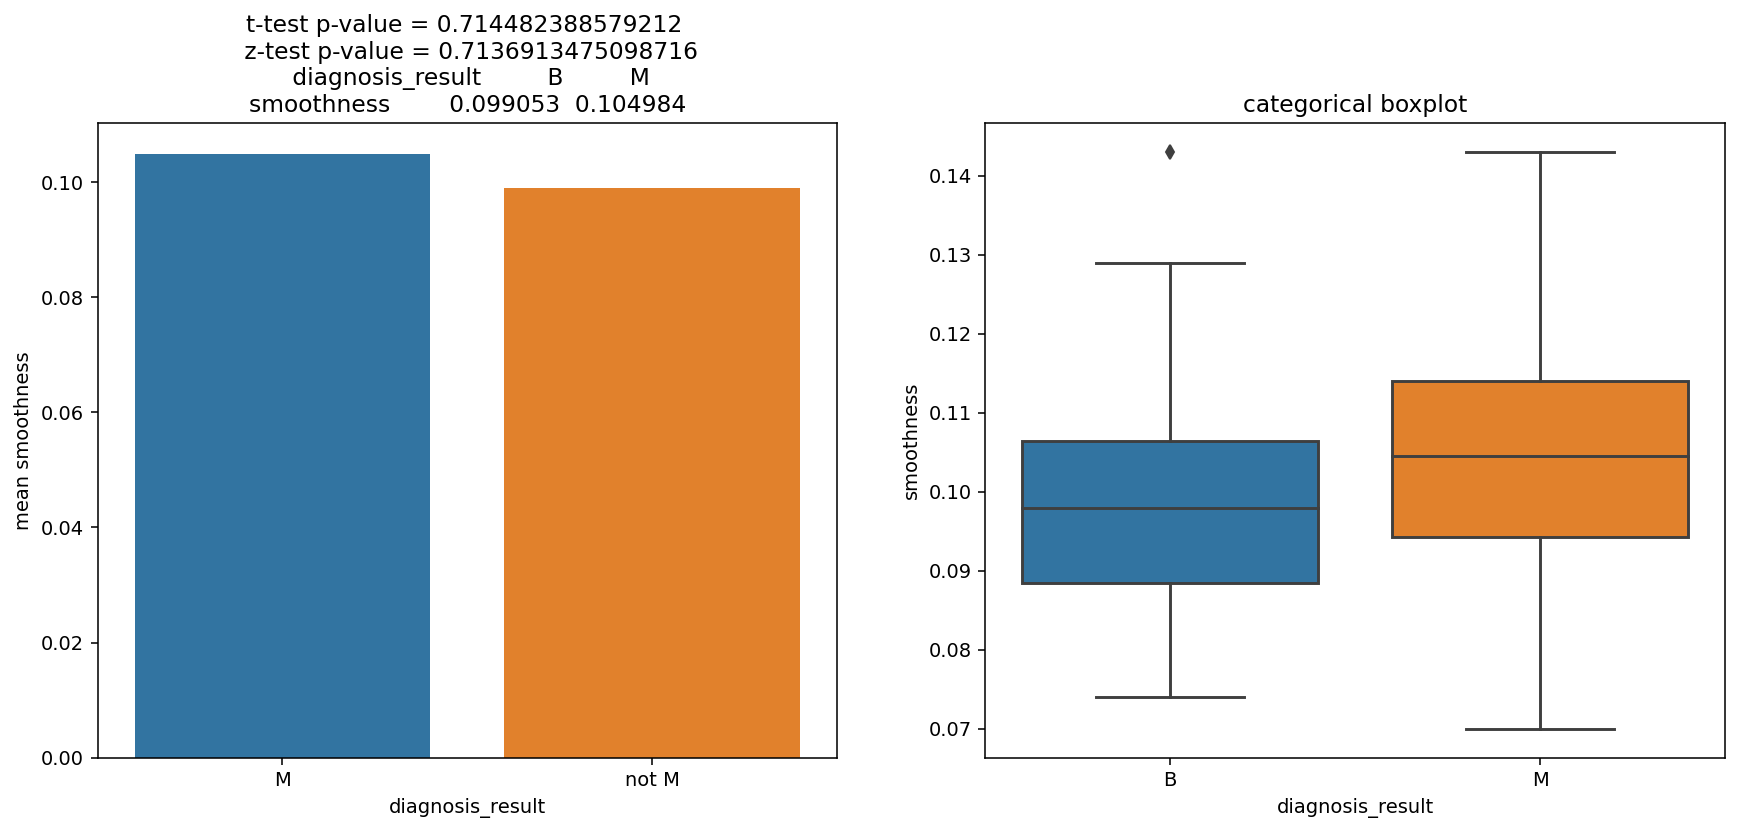

In [38]:
Bivariate_cont_cat(data, 'smoothness', 'diagnosis_result', 'M')

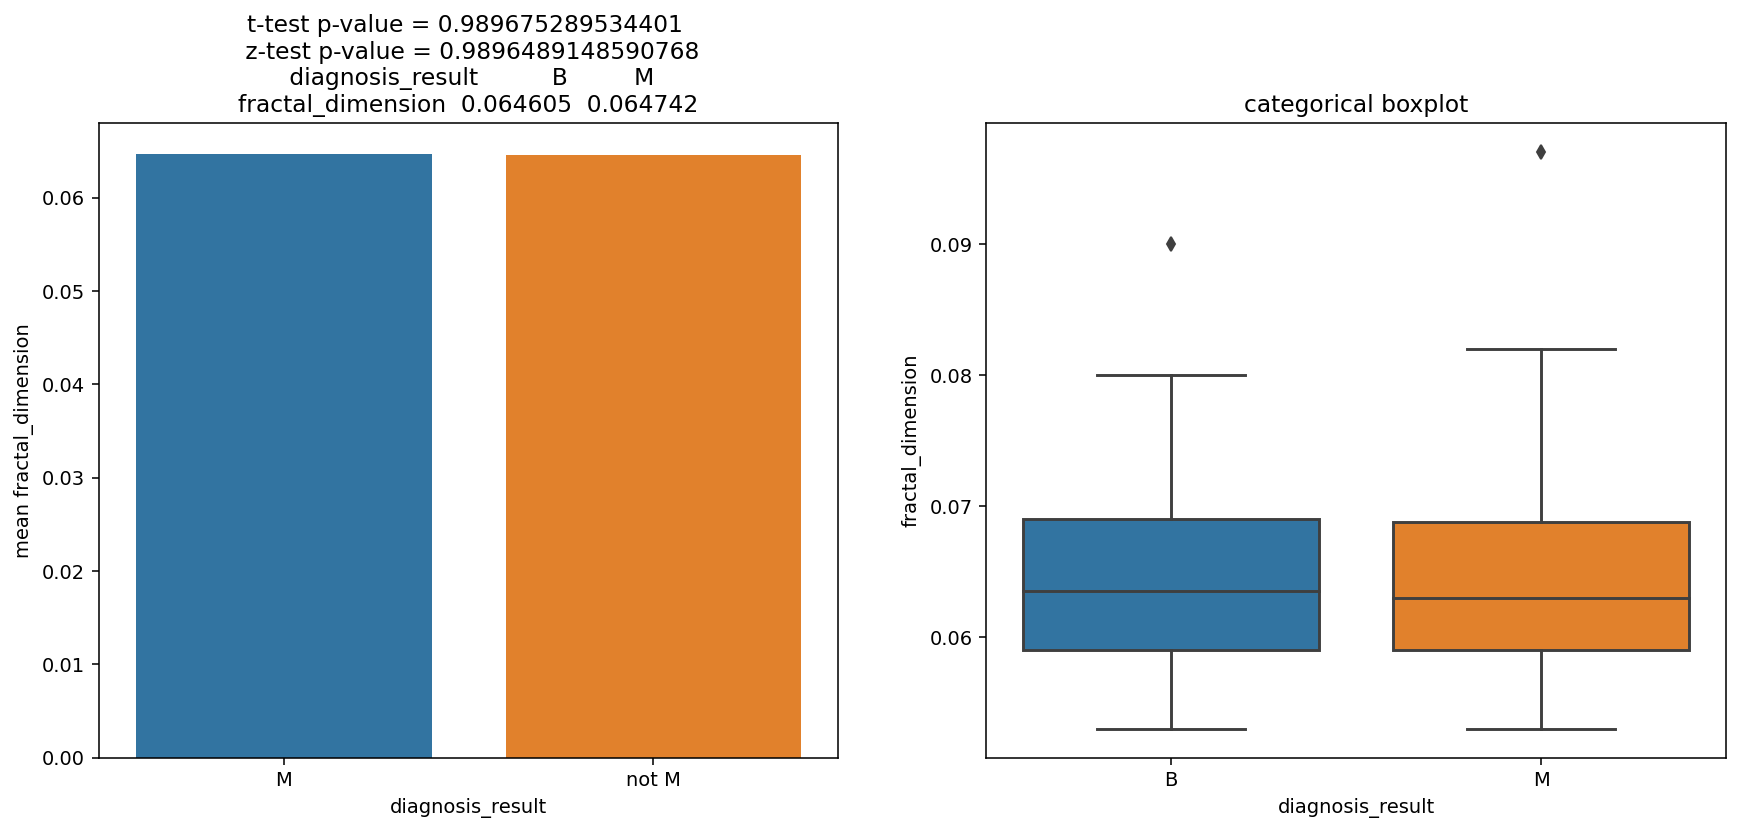

In [39]:
Bivariate_cont_cat(data, 'fractal_dimension', 'diagnosis_result', 'M')

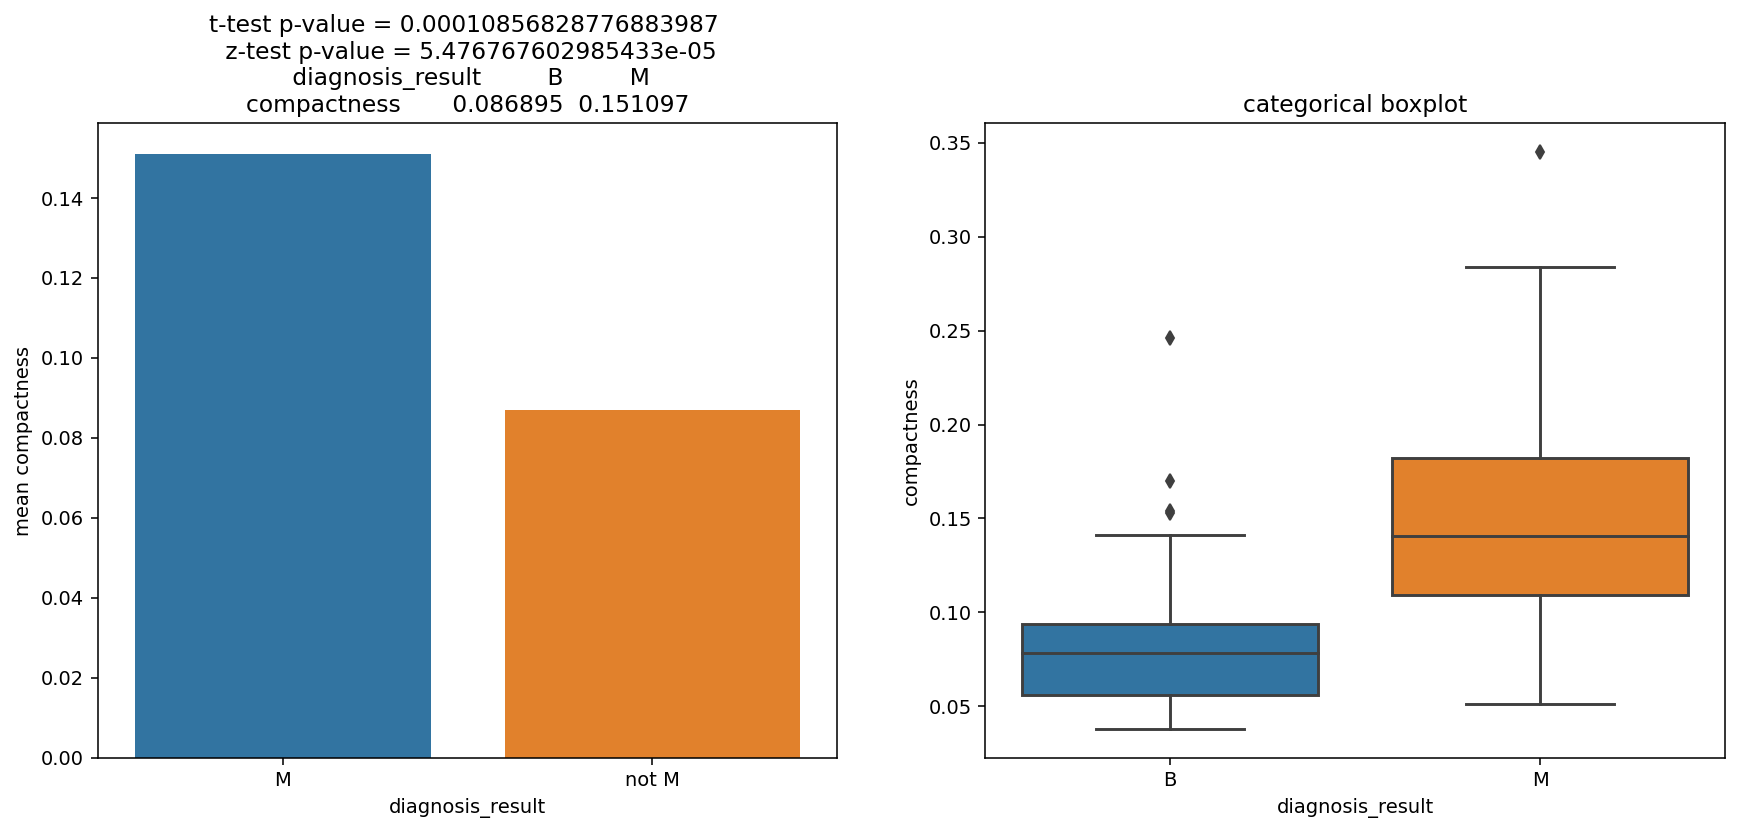

In [40]:
Bivariate_cont_cat(data, 'compactness', 'diagnosis_result', 'M')

malignanat patients have  significantly higher mean_compactness than benign patients

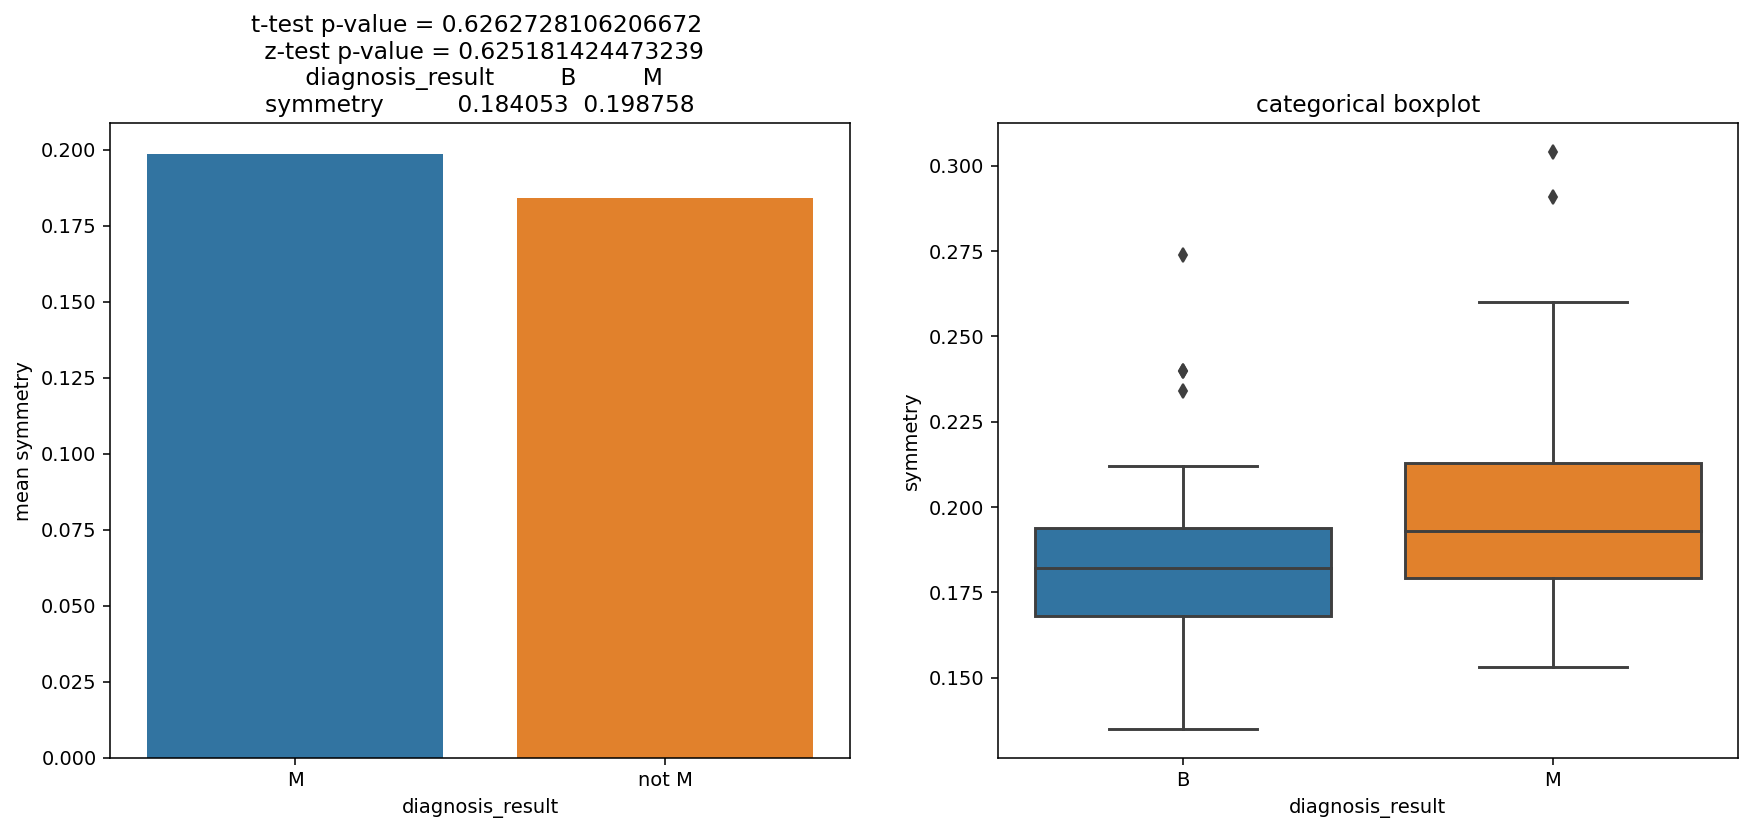

In [41]:
Bivariate_cont_cat(data, 'symmetry', 'diagnosis_result', 'M')

# **Feature Transformation**

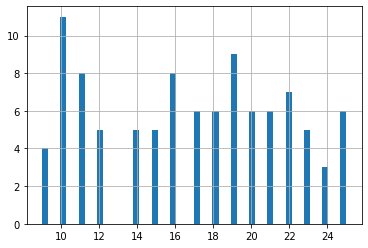

In [42]:
data['radius'].hist(bins = 50)

(-0.05467516207964621,
 <matplotlib.axes._subplots.AxesSubplot at 0x7efed5e7f860>)

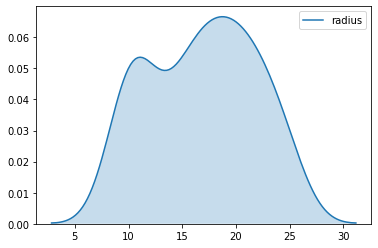

In [43]:
data['radius'].skew(), sns.kdeplot(data['radius'], shade=True)

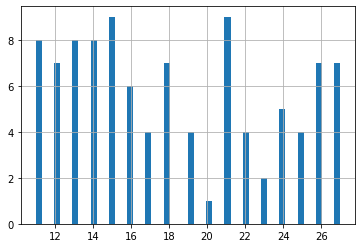

In [44]:
data['texture'].hist(bins = 50)

(0.29394699336380664,
 <matplotlib.axes._subplots.AxesSubplot at 0x7efed6182470>)

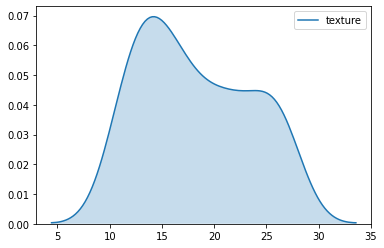

In [45]:
 data['texture'].skew(), sns.kdeplot(data['texture'], shade=True)

In [46]:
 #transforming the variable using squareroot
 data['texture'] = np.sqrt( data['texture'])

(0.1451762350512011, <matplotlib.axes._subplots.AxesSubplot at 0x7efed620f278>)

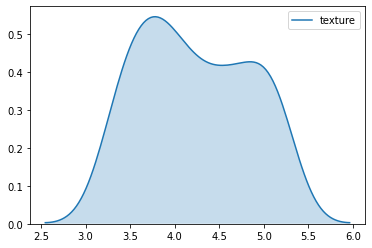

In [47]:
 data['texture'].skew(), sns.kdeplot(data['texture'], shade=True)

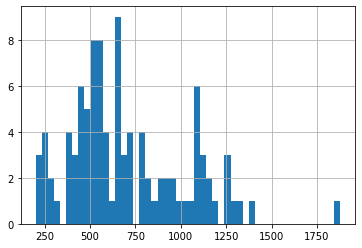

In [48]:
data['area'].hist(bins = 50)

(0.8362800137808444, <matplotlib.axes._subplots.AxesSubplot at 0x7efed62aa6a0>)

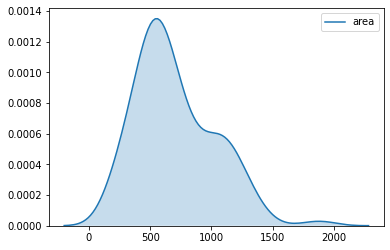

In [49]:
data['area'].skew(), sns.kdeplot(data['area'], shade = True)

Area is right skewed

In [50]:
 #transforming the variable using squareroot
data['area']= np.sqrt(data['area'])

(0.29291780278570423,
 <matplotlib.axes._subplots.AxesSubplot at 0x7efed6364780>)

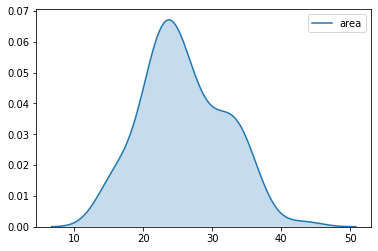

In [51]:
data['area'].skew(), sns.kdeplot(data['area'], shade = True)

skewness is reduced to 0.29

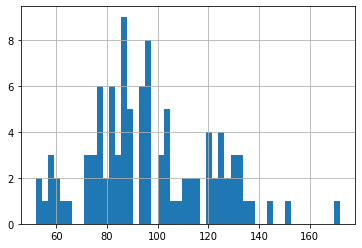

In [52]:
data['perimeter'].hist(bins = 50)

(0.4458282267092749, <matplotlib.axes._subplots.AxesSubplot at 0x7efed645e4e0>)

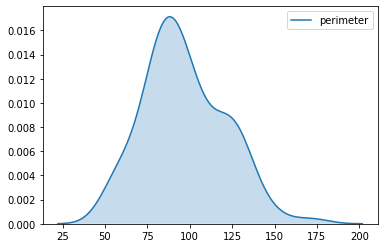

In [53]:
data['perimeter'].skew(), sns.kdeplot(data['perimeter'], shade = True)

perimeter is slightly right skewed

In [54]:
 #transforming the variable sqareroot
data['perimeter']= np.sqrt(data['perimeter'])

(0.13146298222603547,
 <matplotlib.axes._subplots.AxesSubplot at 0x7efed60a56d8>)

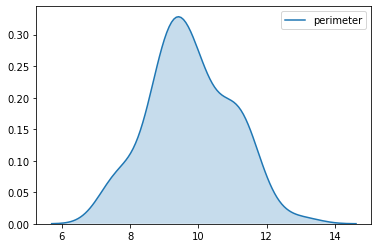

In [55]:
data['perimeter'].skew(), sns.kdeplot(data['perimeter'], shade = True)

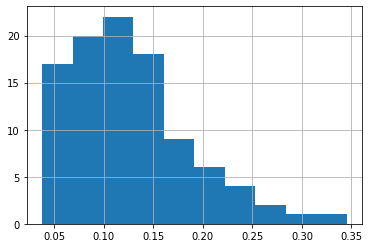

In [56]:
data['compactness'].hist()

(0.9753047172808019, <matplotlib.axes._subplots.AxesSubplot at 0x7efed6605c18>)

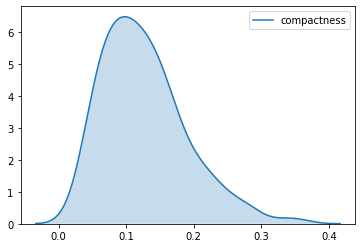

In [57]:
data['compactness'].skew(), sns.kdeplot(data['compactness'],shade = True)

compactness is highly right skewed

In [58]:
 #log transforming the variable 
data['compactness'] = np.log(data['compactness']+1)

(0.8248376162201835, <matplotlib.axes._subplots.AxesSubplot at 0x7efed63f76d8>)

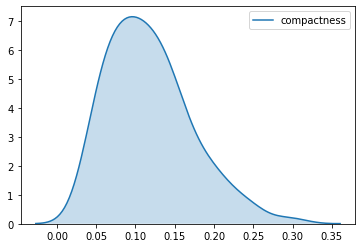

In [59]:
data['compactness'].skew(), sns.kdeplot(data['compactness'],shade = True)

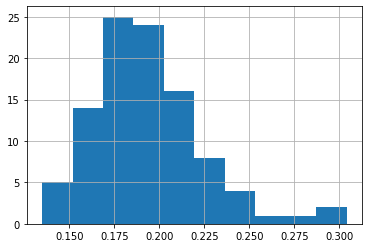

In [60]:
data['symmetry'].hist()

(0.9745028237449184, <matplotlib.axes._subplots.AxesSubplot at 0x7efed5d7f0f0>)

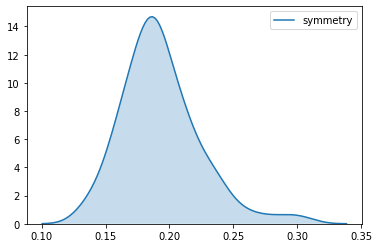

In [61]:
data['symmetry'].skew(), sns.kdeplot(data['symmetry'], shade = True)

symmetry is also highly skewed

In [62]:
data['symmetry'] = np.log(data['symmetry']+1)

(0.871444981605138, <matplotlib.axes._subplots.AxesSubplot at 0x7efed5cf3f28>)

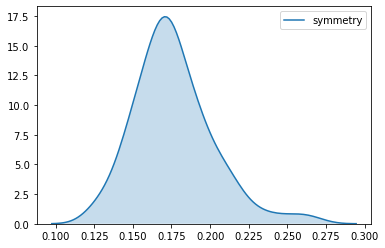

In [63]:
data['symmetry'] .skew(), sns.kdeplot(data['symmetry'],shade = True)

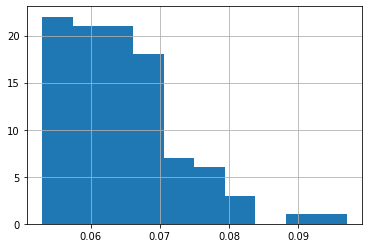

In [64]:
data['fractal_dimension'].hist()

(1.153390163178528, <matplotlib.axes._subplots.AxesSubplot at 0x7efed5bd6cf8>)

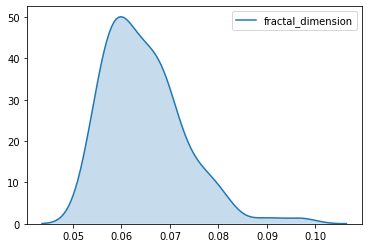

In [65]:
data['fractal_dimension'].skew(), sns.kdeplot(data['fractal_dimension'], shade = True)

fractal_dimension is right skewed

In [66]:
data['fractal_dimension'] = np.log(data['fractal_dimension']+ 0.1)

(0.9789901911924853, <matplotlib.axes._subplots.AxesSubplot at 0x7efed5b48fd0>)

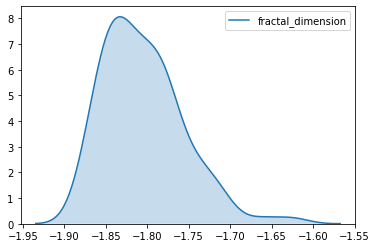

In [67]:
data['fractal_dimension'].skew(), sns.kdeplot(data['fractal_dimension'], shade = True)

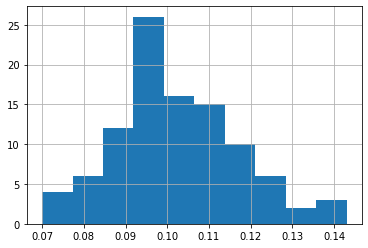

In [68]:
data['smoothness'].hist()

(0.4633724440759245, <matplotlib.axes._subplots.AxesSubplot at 0x7efed5a9a358>)

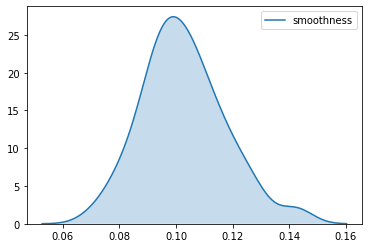

In [69]:
data['smoothness'].skew(), sns.kdeplot(data['smoothness'],shade = True)

In [70]:
data['smoothness'] = np.log(data['smoothness']+1)

(0.4221846169263347, <matplotlib.axes._subplots.AxesSubplot at 0x7efed5a7d828>)

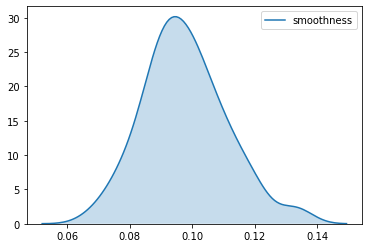

In [71]:
data['smoothness'].skew(), sns.kdeplot(data['smoothness'],shade = True)

# **Random Forest classifier**

In [72]:
#independent variables
x = data.drop(['diagnosis_result'], axis=1)

#dependent variable
y = data['diagnosis_result'].map({'B' : 0, 'M' : 1})

In [73]:
#from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [74]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(x)
scaled_data = pd.DataFrame(scaled_data, columns = x.columns)
scaled_data.head()

,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,0.8750,0.078465,0.859976,0.572540,1.000000,0.802787,0.649048,0.620922
1,0.0000,0.153723,0.731983,0.762334,1.000000,0.149514,0.286223,0.102102
2,0.7500,1.000000,0.709826,0.702931,0.759486,0.428888,0.443110,0.176986
3,0.3125,0.363589,0.274512,0.186594,0.000000,0.820864,0.752710,1.000000
4,0.0000,0.554540,0.746615,0.748585,0.973464,0.337992,0.286223,0.152182


In [75]:
#import the train-test split
from sklearn.model_selection import train_test_split

In [76]:
#divide into train and test sets
train_x,test_x,train_y,test_y = train_test_split(scaled_data,y, random_state = 101, stratify=y)

In [77]:
#Importing random forest classifier 
from sklearn.ensemble import RandomForestClassifier

In [78]:
#creating a random forest instance
clf = RandomForestClassifier(random_state=96)

In [79]:
#train the model
clf.fit(train_x,train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=96, verbose=0,
                       warm_start=False)

In [80]:
#score on training data
clf.score(train_x, train_y)

1.0

In [81]:
#score on test data
clf.score(test_x, test_y)

0.92

In [82]:
#looking at the feature importance
clf.feature_importances_

array([0.05296222, 0.05261413, 0.17682274, 0.26202992, 0.08097245,
       0.22614337, 0.08209795, 0.06635721])

In [83]:
#feature importance against each variable
pd.Series(clf.feature_importances_, index=train_x.columns)

radius               0.052962
texture              0.052614
perimeter            0.176823
area                 0.262030
smoothness           0.080972
compactness          0.226143
symmetry             0.082098
fractal_dimension    0.066357
dtype: float64

In [84]:
parameter_grid = {
    'max_depth' : [4,5,6,7],
    'max_features': [0.5, 0.7],
    #'n_estimators' : [50,70,90,100],
    'min_samples_leaf' : [2, 4, 8]
    }

In [85]:
from sklearn.model_selection import GridSearchCV
gridsearch = GridSearchCV(estimator=clf, param_grid=parameter_grid, scoring='neg_mean_squared_error', cv=5)

In [86]:
gridsearch.fit(train_x, train_y)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=96,
                                  

In [87]:
gridsearch.best_params_

{'max_depth': 4, 'max_features': 0.7, 'min_samples_leaf': 2}

In [88]:
#creating a random forest  instance with new hyperparameter values
clf = RandomForestClassifier(random_state=101, max_depth = 4, max_features = 0.9, min_samples_leaf = 2)

In [89]:
#train the model
clf.fit(train_x,train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features=0.9,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=101,
                       verbose=0, warm_start=False)

In [90]:
#train the model
clf.score(train_x,train_y)

0.96

In [91]:
clf.score(test_x,test_y)

0.92

# **Xgboost classifier**

In [92]:
!pip install xgboost

In [93]:
#Importing XGBM Classifier 
from xgboost import XGBClassifier

In [94]:
#creating an extreme Gradient boosting instance
clf = XGBClassifier(random_state=96)

In [95]:
#training the model
clf.fit(train_x,train_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=96,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [96]:
#calculating score on training data
clf.score(train_x, train_y)

1.0

In [97]:
#calculating score on test data
clf.score(test_x, test_y)

0.88

In [98]:
parameter_grid = {
    'max_depth' : [4,5,6,7],
    'max_features': [0.5, 0.7],
    #'n_estimators' : [50,70,90,100],
    'min_samples_leaf' : [2, 4, 8],
    'colsample_bytree':[0.7, 0.9]}

In [99]:
from sklearn.model_selection import GridSearchCV
gridsearch = GridSearchCV(estimator=clf, param_grid=parameter_grid, scoring='neg_mean_squared_error', cv=5)

In [100]:
gridsearch.fit(train_x, train_y)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=96, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'colsample_bytree': [0.7, 0.9],
                         'max_depth': [4, 5, 6, 7], 'max_features': [0.5, 0.7],
                         'min_samples_l

In [101]:
gridsearch.best_params_

{'colsample_bytree': 0.7,
 'max_depth': 4,
 'max_features': 0.5,
 'min_samples_leaf': 2}

In [102]:
#creating an extreme Gradient boosting instance
clf = XGBClassifier(random_state=96, colsample_bytree = 1, max_depth = 2, max_features = 1, min_samples_leaf = 1)

In [103]:
clf.fit(train_x,train_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=2, max_features=1,
              min_child_weight=1, min_samples_leaf=1, missing=None,
              n_estimators=100, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=96, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)

In [104]:
clf.score(train_x,train_y)

0.9733333333333334

In [105]:
clf.score(test_x, test_y)

0.92

# **Ada boost**

In [106]:
#Importing AdaBoost Classifier 
from sklearn.ensemble import AdaBoostClassifier

In [107]:
#creating an AdaBoost instance
clf = AdaBoostClassifier(random_state=96)

In [108]:
#training the model
clf.fit(train_x,train_y)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=96)

In [109]:
clf.score(train_x,train_y)

1.0

In [110]:
clf.score(test_x,test_y)

0.88

In [111]:
parameter_grid = {#'base_estimator': [DecisionTreeClassifier, RandomForestClassifier],
'n_estimators' : [50, 100, 200],
'learning_rate' : [0.7, 1]}

In [112]:
from sklearn.model_selection import GridSearchCV
gridsearch = GridSearchCV(estimator=clf, param_grid=parameter_grid, scoring='neg_mean_squared_error', cv=5)

In [113]:
gridsearch.fit(train_x,train_y)

GridSearchCV(cv=5, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=96),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.7, 1],
                         'n_estimators': [50, 100, 200]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [114]:
gridsearch.best_params_

{'learning_rate': 0.7, 'n_estimators': 100}

In [115]:
clf = AdaBoostClassifier(random_state=96, base_estimator=RandomForestClassifier(random_state=101, max_depth = 4, max_features = 0.7, min_samples_leaf = 2),
                         n_estimators = 50, learning_rate = 1)

In [116]:
clf.fit(train_x,train_y)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=4,
                                                         max_features=0.7,
                                                         max_leaf_nodes=None,
                                                         max_samples=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=2,
                                                         min_samples_split=2,
                                             

In [117]:
clf.score(train_x,train_y)

0.9733333333333334

In [118]:
clf.score(test_x,test_y)

0.96

# **Stacking**

In [119]:
#base models
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

In [120]:
def model_predictions(model, train_x, train_y, test_x):
    
    #train the model
    model.fit(train_x,train_y)
    
    #storing predictions for train and test
    pred_train=model.predict(train_x)
    pred_test=model.predict(test_x)
    return pred_train, pred_test

In [123]:
#Model 1 - Random Forest
RF = RandomForestClassifier(random_state=101, max_depth = 4, max_features = 0.9, min_samples_leaf = 2)
M1_train, M1_test = model_predictions(RF, train_x, train_y, test_x)
M1_train, M1_test

(array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
        1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
        1, 0, 1, 1, 1, 1, 0, 1, 1]),
 array([0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
        0, 0, 1]))

In [125]:
#Model 2 - XGboost
XGB = XGBClassifier(random_state=96, colsample_bytree = 1, max_depth = 2, max_features = 1, min_samples_leaf = 1)
M2_train, M2_test = model_predictions(XGB, train_x, train_y, test_x)

In [127]:
#Model 3 - Adaboost
AG =AdaBoostClassifier(random_state=96, base_estimator=RandomForestClassifier(random_state=101, max_depth = 4, max_features = 0.7, min_samples_leaf = 2),
                         n_estimators = 50, learning_rate = 1)
M3_train, M3_test = model_predictions(XGB, train_x, train_y, test_x)

In [128]:
#Creating a New train dataframe
train_prediction = {
              'RF': M1_train,
              'XGB': M2_train,
              'AB': M3_train
              }
train_predictions = pd.DataFrame(train_prediction)
train_predictions.head()

,RF,XGB,AB
0,1,1,1
1,1,1,1
2,1,1,1
3,0,0,0
4,0,0,0


In [129]:
#Creating a New test dataframe
test_prediction = {
              'Rf': M1_test,
              'XGB': M2_test,
              'AB': M3_test
              }
test_predictions = pd.DataFrame(test_prediction)
test_predictions.head()

,Rf,XGB,AB
0,0,0,0
1,1,1,1
2,1,1,1
3,1,1,1
4,1,1,1


In [132]:
# Stacker Model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(train_predictions, train_y)
model.score(test_predictions,test_y)

0.92

# **Variants of stacking**

In [133]:
from sklearn.model_selection import train_test_split as tts

train_x, test_x, train_y, test_y = tts (x, y, random_state = 9 , stratify = y)
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((75, 8), (25, 8), (75,), (25,))

In [135]:
from sklearn.model_selection import KFold

def kfold_predictions( model , n_splits , train_x , train_y, test_x ):
    ## Initializing empty Numpy Arrays
    train_pred = np.empty((0,0) , int)
    skfold = KFold(n_splits, random_state = 9)
  
    #For every permutation of KFold
    for i,j in skfold.split(train_x, train_y):
        x_train, x_test = train_x.iloc[i], train_x.iloc[j]
        y_train, y_test = train_y.iloc[i], train_y.iloc[j]
    
        #Train a model on training set
        model.fit( X = x_train, y = y_train)
    
        #Predict on Chosen Group
        tmp = model.predict(x_test)
    
        #Storing train predictions
        train_pred = np.append(train_pred, tmp)
    
    #Training on complete data and generating Predictions on Test set
    model.fit(train_x, train_y)
    test_pred = model.predict(test_x)
  
    return train_pred, test_pred

In [136]:
M1_train, M1_test = kfold_predictions(RF, 10, train_x, train_y, test_x)

In [137]:
M2_train, M2_test = kfold_predictions(XGB, 10, train_x, train_y, test_x)

In [139]:
M3_train, M3_test= kfold_predictions(AG, 10, train_x, train_y, test_x) 

In [140]:
#Creating a New train dataframe
train_prediction = {
              'RF': M1_train,
              'XGB': M2_train,
              'AB': M3_train
              }
train_predictions = pd.DataFrame(train_prediction)
train_predictions.head()

,RF,XGB,AB
0,0,0,0
1,1,1,1
2,1,1,1
3,1,1,1
4,0,0,0


In [141]:
#Creating a New test dataframe
test_prediction = {
              'Rf': M1_test,
              'XGB': M2_test,
              'AB': M3_test
              }
test_predictions = pd.DataFrame(test_prediction)
test_predictions.head()

,Rf,XGB,AB
0,1,1,1
1,0,0,0
2,1,1,1
3,0,0,0
4,0,0,0


In [142]:
# Final Model taking the previous predictions as training set
model= LogisticRegression()
model.fit(train_predictions, train_y)
final = model.predict(test_predictions)
model.score( test_predictions ,test_y)

0.84

# **Blending**

In [143]:
def blending(model, train_x, train_y, test_x):
    #train validation split
    x_train, x_valid, y_train, y_valid = tts(train_x, train_y, random_state=9)
    
    #fit on training
    model.fit(x_train, y_train)
    
    #predict on validation and test
    valid_pred = model.predict(x_valid)
    score=model.score(x_valid, y_valid)
    print('Validation Score', score)
    
    test_pred=model.predict(test_x)
    #return validation pred, test pred
    return valid_pred, y_valid, test_pred

In [144]:
M1_valid, M1_target, M1_test = blending(RF, train_x, train_y, test_x)

Validation Score 0.7894736842105263


In [145]:
M2_valid, M2_target, M2_test = blending(XGB, train_x, train_y, test_x)

Validation Score 0.7368421052631579


In [146]:
M3_valid, M3_target, M3_test = blending(AG, train_x, train_y, test_x)

Validation Score 0.7894736842105263


In [151]:
#Creating a New train dataframe
train_prediction = {
              'RF': M1_valid,
              'XGB': M2_valid,
              'AB': M3_valid
              }
train_predictions = pd.DataFrame(train_prediction)
train_predictions.head()

,RF,XGB,AB
0,1,1,1
1,1,1,1
2,1,1,1
3,1,1,1
4,0,0,0


In [152]:
#Creating a New test dataframe
test_prediction = {
              'Rf': M1_test,
              'XGB': M2_test,
              'AB': M3_test
              }
test_predictions = pd.DataFrame(test_prediction)
test_predictions.head()

,Rf,XGB,AB
0,1,1,1
1,0,0,0
2,1,1,1
3,0,0,0
4,0,0,0


In [155]:
# Final Model taking the previous predictions as training set
model= LogisticRegression()
model.fit(train_predictions, M1_target)
final = model.predict(test_predictions)
model.score( test_predictions ,test_y)

0.84